# **Data Analysis: Major Selection for Third-Year BSIT Students in the College of Computer Studies at Laguna State Polytechnic University**

***Description: This study undertakes a comprehensive analysis of the influencing factors that guide BSIT students in selecting their academic tracks, aiming to uncover the key determinants that shape their decision-making process.***



**Respondents:** BSIT Second Year Students

**Questionnaire:**

1. What is your gender?

2. What is your grade in Fundamentals of Programming?

3. What is your grade in Intermediate Programming?

4. How good are you in programming? (Rate 1-5, with 5 being the highest.)

5. Work preference after graduation? (BPO, PROGRAMMER, or FREELANCE)

6. What major do you prefer for the third year? (SMP or WAMD)



### **Import Libraries and Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/majorfinal.csv.csv")
dataset.head()

,GENDER,GRADE (Fundamentals),GRADE (Intermediate),Proficiency in Coding,WORK PREFERENCE,MAJOR
0,male,1.25,1.25,4,freelance,smp
1,male,1.50,1.75,4,freelance,wamd
2,male,2.00,2.25,3,bpo,smp
3,male,1.25,1.50,3,programmer,wamd
4,male,2.50,2.75,3,bpo,smp


### **Data Exploration**

In [ ]:
dataset.describe()

,GRADE (Fundamentals),GRADE (Intermediate),Proficiency in Coding
count,100.000000,100.00000,100.000000
mean,2.062500,1.91500,3.070000
std,0.429903,0.36101,0.555141
min,1.250000,1.25000,2.000000
25%,1.750000,1.75000,3.000000
50%,2.000000,1.75000,3.000000
75%,2.250000,2.00000,3.000000
max,3.000000,2.75000,5.000000


### **Counting Male and Female and Respondents in each Major**

In [ ]:
# Count the number of respondents
gender_counts = dataset['GENDER'].value_counts()

# Count the number of males and females for SMP
smp_counts = dataset[dataset['MAJOR'] == 'smp']['GENDER'].value_counts()

# Count the number of males and females for WAMD
wamd_counts = dataset[dataset['MAJOR'] == 'wamd']['GENDER'].value_counts()

# Display the counts
print("No. of Students")
print()
print(gender_counts)
print()
print()
print("SMP Counts")
print()
print(smp_counts)
print()
print("\nWAMD Counts")
print()
print(wamd_counts)

No. of Students

male      69
female    31
Name: GENDER, dtype: int64


SMP Counts

male      46
female    19
Name: GENDER, dtype: int64


WAMD Counts

male      23
female    12
Name: GENDER, dtype: int64


# **Data Visualization**

### **Display the male and female respondents using a pie chart.**

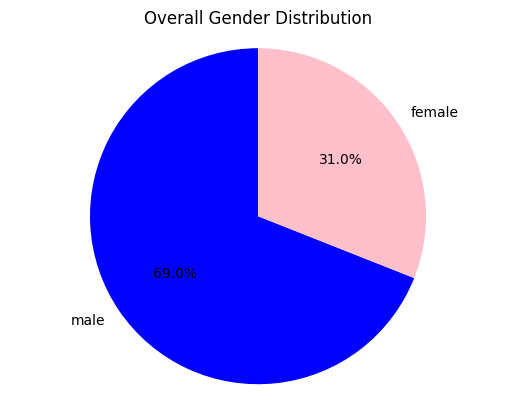

In [ ]:
# Plotting a pie chart for gender distribution
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
ax.axis('equal')

# Set the title
plt.title('Overall Gender Distribution')

# Show the plot
plt.show()



**Based on the pie chart, females constitute only 1/3 of the total respondents.**

### **Visualize the number of males and females from each major.**

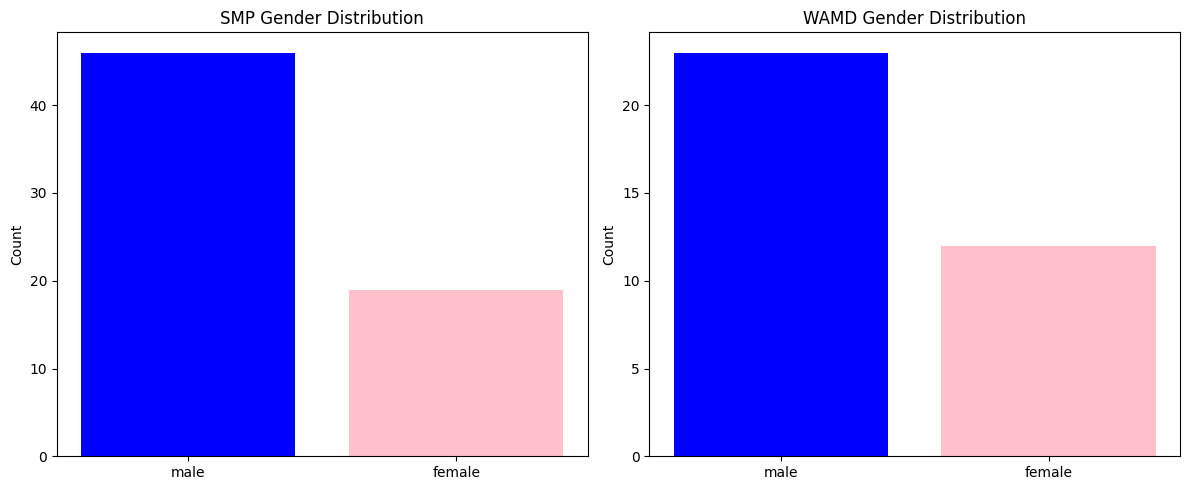

In [ ]:
# Count the number of males and females for SMP
smp_counts = dataset[dataset['MAJOR'] == 'smp']['GENDER'].value_counts()

# Count the number of males and females for WAMD
wamd_counts = dataset[dataset['MAJOR'] == 'wamd']['GENDER'].value_counts()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# SMP Counts
axes[0].bar(smp_counts.index, smp_counts.values, color=['blue', 'pink'])
axes[0].set_title('SMP Gender Distribution')
axes[0].set_ylabel('Count')

# WAMD Counts
axes[1].bar(wamd_counts.index, wamd_counts.values, color=['blue', 'pink'])
axes[1].set_title('WAMD Gender Distribution')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**We can observe a similarity in the gender distribution across majors.**

### **How Students' Grades Affect Their Major Selection**

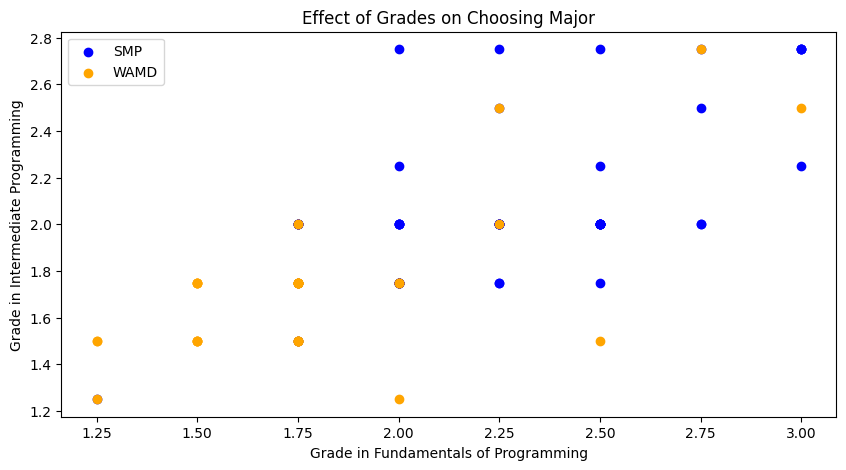

In [ ]:
plt.figure(figsize=(10, 5))

# SMP Major
plt.scatter(
    dataset[dataset['MAJOR'] == 'smp']['GRADE (Fundamentals)'],
    dataset[dataset['MAJOR'] == 'smp']['GRADE (Intermediate)'],
    label='SMP',
    color='blue'
)

# WAMD Major
plt.scatter(
    dataset[dataset['MAJOR'] == 'wamd']['GRADE (Fundamentals)'],
    dataset[dataset['MAJOR'] == 'wamd']['GRADE (Intermediate)'],
    label='WAMD',
    color='orange'
)

# Set labels and title
plt.xlabel('Grade in Fundamentals of Programming')
plt.ylabel('Grade in Intermediate Programming')
plt.title('Effect of Grades on Choosing Major')
plt.legend()

# Show the plot
plt.show()

**We can assume from this visualization that most students with higher grades prefer WAMD as their major for the third year.**

### **Show how coding proficiency affects the decision-making process regarding which track to choose for the third-year major.**

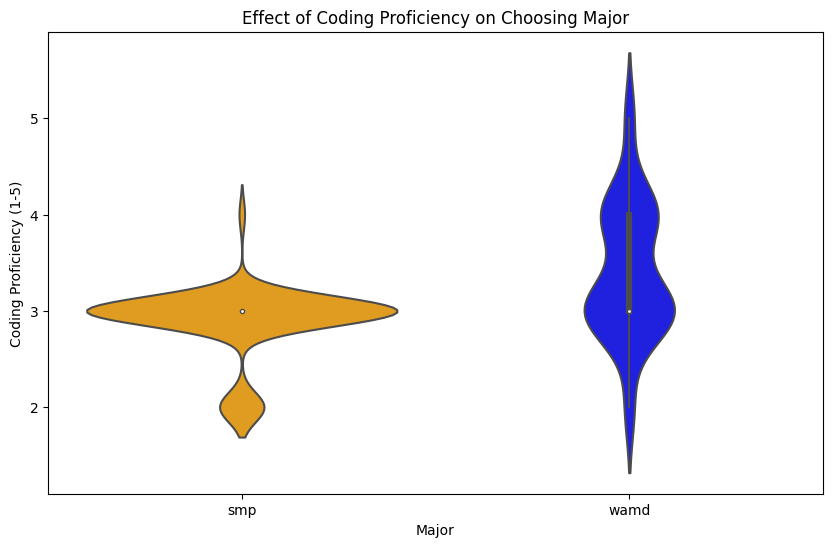

In [ ]:
# Define custom colors for SMP and WAMD
custom_palette = {'smp': 'orange', 'wamd': 'blue'}

# Violin plot for Coding Proficiency by Major with exchanged colors
plt.figure(figsize=(10, 6))
sns.violinplot(x='MAJOR', y='Proficiency in Coding', data=dataset, palette=custom_palette)

# Set labels and title
plt.xlabel('Major')
plt.ylabel('Coding Proficiency (1-5)')
plt.title('Effect of Coding Proficiency on Choosing Major')

# Show the plot
plt.show()

**We can see that most of the students with average and below-average coding proficiency commonly choose SMP as their major**.

### **Display the count for each work preference.**

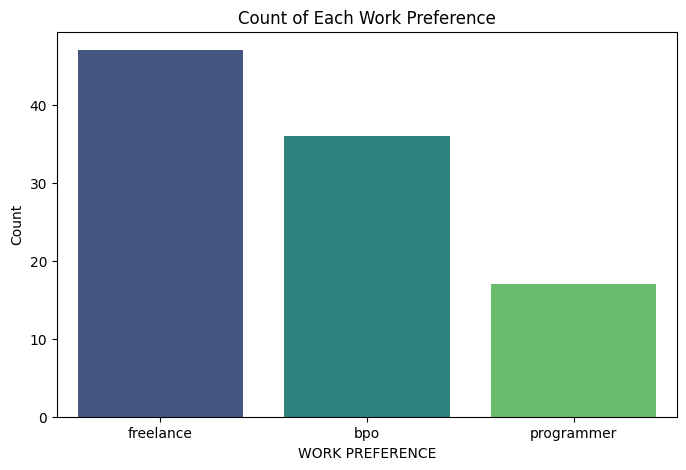

In [ ]:
# Bar plot for Work Preference
plt.figure(figsize=(8, 5))
sns.countplot(x='WORK PREFERENCE', data=dataset, palette='viridis')

# Set labels and title
plt.xlabel('WORK PREFERENCE')
plt.ylabel('Count')
plt.title('Count of Each Work Preference')

# Show the plot
plt.show()

**Most of the BSIT students preferred to work as freelancers.**

### **Display Work Preference Distribution Across Majors**

<Figure size 1000x600 with 0 Axes>

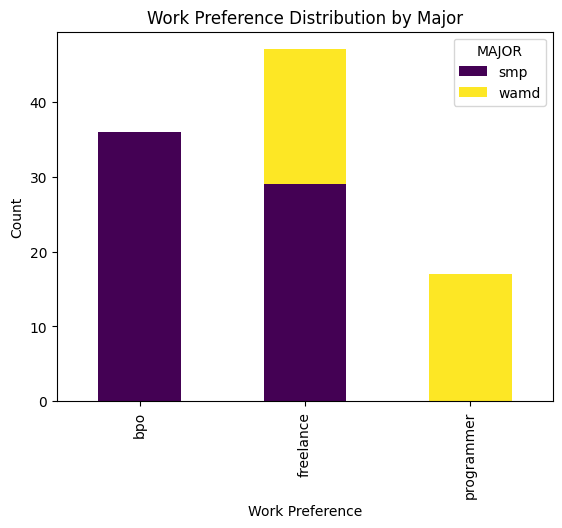

In [ ]:
cross_tab = pd.crosstab(dataset['WORK PREFERENCE'], dataset['MAJOR'])

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

# Set labels and title
plt.xlabel('Work Preference')
plt.ylabel('Count')
plt.title('Work Preference Distribution by Major')

plt.show()

**Individuals who choose SMP commonly prefer working in BPO companies, while those who select WAMD as their major often become programmers. Freelancing is embraced by both SMP and WAMD students, though there are more SMP students engaged in freelancing compared to WAMD.**

### **Summary:**


**Gender Distribution:**

The study included 69 male (69%) and 31 female (31%) respondents.
Males constitute a higher percentage of the total respondents.


**Gender Distribution Across Majors:**

In the SMP major, there were 46 males (75%) and 19 females (25%).
In the WAMD major, there were 23 males (66%) and 12 females (34%).


**Effect of Grades on Major Selection:**

A scatter plot analysis revealed a potential correlation between higher grades and a preference for the WAMD major.
This suggests that students with higher grades in Fundamentals of Programming and Intermediate Programming may lean towards choosing WAMD as their major.


**Effect of Coding Proficiency on Major Selection:**

A violin plot showcased that students with average and below-average coding proficiency often choose SMP as their major, while those with higher proficiency may opt for WAMD.


**Work Preference Distribution:**

A count plot revealed that a majority of students (across both majors) preferred freelancing after graduation. The second most common preference was to work in BPO roles, with fewer students opting to work as programmers.


**Work Preference Distribution Across Majors:**

A stacked bar plot illustrated that students in SMP commonly preferred BPO roles, while WAMD students leaned towards becoming programmers.
Freelancing was embraced by students in both majors, with slightly more SMP students engaging in freelancing compared to WAMD.



### **Conclusion:**

The study provides valuable insights into the decision-making process of BSIT second-year students at Laguna State Polytechnic University. Gender distribution, academic performance, coding proficiency, and work preference are all factors that influence the selection of majors (SMP or WAMD). The findings suggest potential patterns in major selection based on these factors, providing valuable information for academic advisors and program planners. The study contributes to understanding the dynamics that shape students' decisions in pursuing specific tracks within the BSIT program.




